<a href="https://colab.research.google.com/github/BorutFlis/predictor/blob/master/Covid_exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget https://raw.githubusercontent.com/BorutFlis/predictor/master/data_file/covid_comparison.csv

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

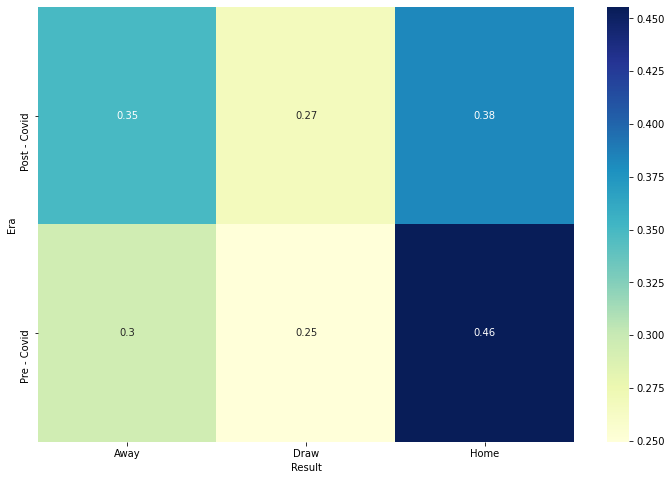

In [6]:
df=pd.read_csv("covid_comparison.csv",index_col=0)

contingency_pct=pd.crosstab(df["Era"],df["Result"],normalize="index")
plt.figure(figsize=(12,8)) 
sns.heatmap(contingency_pct, annot=True, cmap="YlGnBu")

In [7]:
from scipy.stats import chi2_contingency

contingency=pd.crosstab(df["Era"],df["Result"])
c, p, dof, expected = chi2_contingency(contingency)
print(p)

0.00022591928684685428


The p-value of the Chi-Square test is less than 0.05, which means we can reject the hypothesis that the distribtuion of the results is independent of whether the games where pre or post Covid outbreak.


In [21]:
from scipy.stats import ttest_ind
df= df[~df.loc[:,["B365H","B365D","B365A"]].isna().any(axis=1)]
mask=df.Era.eq("Post - Covid")

all_tests=[]
all_tests.append(ttest_ind(df[mask]["B365H"],df[~mask]["B365H"]))
all_tests.append(ttest_ind(df[mask]["B365D"],df[~mask]["B365D"]))
all_tests.append(ttest_ind(df[mask]["B365A"],df[~mask]["B365A"]))

all_tests=pd.DataFrame(all_tests,index=["Home","Draw","Away"])
all_tests.style

,statistic,pvalue
Home,0.591532,0.554206
Draw,-2.252993,0.024327
Away,-5.070303,0.000000


There is a significant difference in the odds for draws and away victories, on the other hand there is not difference home odds, which essentially means they have adjusted for the higher probability of away victories, but not for the lower probability of home victories.
